# Fixing Data Sets

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def save_csv(X, path_len, headers):
    with open( path_len, 'wb') as f:
        f.write(str.encode(','.join(headers)))
        #f.write(bytes("SP,"+lists+"\n","UTF-8"))
        #Used this line for a variable list of numbers
        np.savetxt(f, X.astype('uint8'),  fmt='%i',delimiter = ',')
        
def save_np(X, path):
    with open(path, 'wb') as f:
        np.save(f, X.astype('uint8'))

# Minst-Digits

In [6]:
x_test = np.load("Data/mnist_digit/x_test.npy")
x_train = np.load("Data/mnist_digit/x_train.npy")
y_test = np.load("Data/mnist_digit/y_test.npy")
y_train = np.load("Data/mnist_digit/y_train.npy")

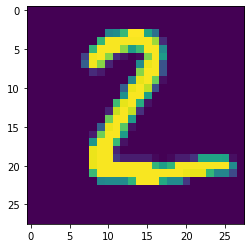

In [7]:
plt.imshow(x_test[1,:,:])

In [8]:
Train = np.concatenate([y_train.reshape((y_train.shape[0],1)), x_train.reshape((x_train.shape[0], 784))], axis = 1).astype('uint8')
Test = np.concatenate([y_test.reshape((y_test.shape[0],1)), x_test.reshape((x_test.shape[0], 784))], axis = 1).astype('uint8')

In [11]:
headers = ['y'] + ['x_'+str(i) for i in np.arange(748)]
save_csv(Train, "Data/mnist_digit/Train.csv", headers)
save_csv(Test, "Data/mnist_digit/Test.csv", headers)

# Minst Fashion


|Label    |Description    |
|:--------|:--------------|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

In [12]:

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [14]:
X_train, Y_train = load_mnist('Data/mnist_fashion/', kind='train')
Train = np.concatenate([Y_train.reshape((Y_train.shape[0],1)), X_train], axis = 1)

X_test, Y_test = load_mnist('Data/mnist_fashion/', kind='t10k')
Test = np.concatenate([Y_test.reshape((Y_test.shape[0],1)), X_test], axis = 1)

Saving files down as CSV

In [15]:
headers = ['y'] + ['x_'+str(i) for i in np.arange(748)]
save_csv(Train, "Data/mnist_fashion/Train.csv", headers )
save_csv(Test, "Data/mnist_fashion/Test.csv", headers)

Now saving as numpy array

In [16]:
save_np(X_train.reshape((X_train.shape[0],28,28)), 'Data/mnist_fashion/x_train.npy')
save_np(Y_train.reshape((Y_train.shape[0],1)), 'Data/mnist_fashion/y_train.npy')
save_np(X_test.reshape((X_test.shape[0],28,28)), 'Data/mnist_fashion/x_test.npy')
save_np(Y_test.reshape((Y_test.shape[0],1)), 'Data/mnist_fashion/y_test.npy')

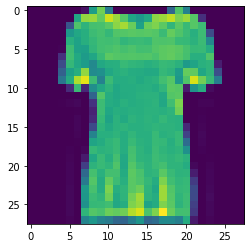

In [17]:
plt.imshow(X_train[10,:].reshape((28,28)))

# Minst Rock Paper Scissors


In [22]:
Test = np.loadtxt('Data/mnist_rps/sign_mnist_test.csv',delimiter = ',', skiprows=1)
Train = np.loadtxt('Data/mnist_rps/sign_mnist_train.csv', delimiter=',', skiprows=1)

In [25]:
x_test = Test[:,1:].reshape((Test.shape[0],28,28))
y_test = Test[:,1].reshape((Test.shape[0],1))

x_train = Train[:,1:].reshape((Train.shape[0],28,28))
y_train = Train[:,1].reshape((Train.shape[0],1))


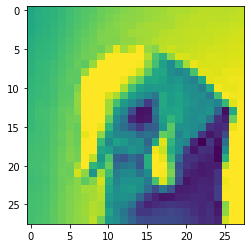

In [30]:
plt.imshow(x_train[5,:,:])

In [31]:
save_np(x_train, 'Data/mnist_rps/x_train.npy')
save_np(y_train, 'Data/mnist_rps/y_train.npy')
save_np(x_test, 'Data/mnist_rps/x_test.npy')
save_np(y_test, 'Data/mnist_rps/y_test.npy')